# SVM

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

+ Effective in high dimensional spaces.

+ Still effective in cases where number of dimensions is greater than the number of samples.

+ Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
일부 서포트 벡터만 사용하므로 메모리 효율이 장점이다.

+ Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

+ If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

+ SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

The support vector machines in scikit-learn support both dense (`numpy.ndarray` and convertible to that by `numpy.asarray`) and sparse (any `scipy.sparse`) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered `numpy.ndarray` (dense) or `scipy.sparse.csr_matrix` (sparse) with `dtype=float64`.

+ Decision Boundaries
w : 법선 벡터  
u : 판별하고자 하는 데이터  
b : bias  
$ w*u + b >= 0 $  을 만족하면 +

+ Widest Street Approach
positive $ w*x_+ + b >= 1 $  
negative $ w*x_- + b <= -1 $

수학적 편의성  positive 이면  $ y_i = 1 $ negative  이면 $ y_i = -1 $  
$ y_i*(w * x_i + b ) >= 1 $ ,  $ y_i*(w * x_i + b ) -1 >= 0 $

그때 width 는 
$ width = (x_+ - x_-)* {{w}\over{||w||}} = {2 \over ||w||} $

목표는 $ Max {2 \over ||w||} -> Max {1 \over ||w||} -> Min ||w|| -> Min {||w||^2 \over 2} $

최적화 lagrangian  
$ L = - \frac{1}{2} \sum_j \sum_i \alpha_i \alpha_j y_i y_j x_i^T x_j + \sum \alpha_i $  

$ max ~ W(\alpha) = \sum \alpha_i - \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j x_i^T x_j $

## 1. Classification

In [1]:
from sklearn import svm
X = [[0, 0], [1, 1], [-1, 0], [-1, -1], [3, 3]]
y = [0, 1, 0, 0, 1]
clf = svm.SVC()
clf.fit(X, y)
clf.predict([[2., 2.]])

array([1])

In [2]:
# get support vectors
print(clf.support_vectors_)

# get indices of support vectors
print(clf.support_)

# get number of support vectors for each class
print(clf.n_support_)

[[ 0.  0.]
 [-1.  0.]
 [-1. -1.]
 [ 1.  1.]
 [ 3.  3.]]
[0 2 3 1 4]
[3 2]


##### Maximum margin separating hyperplane

In [3]:
from sklearn.datasets import make_blobs
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

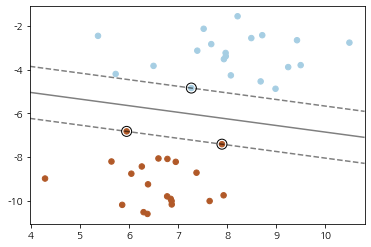

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
# meshgrid 를 이용하여 등고선을 그리는 방식 사용
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

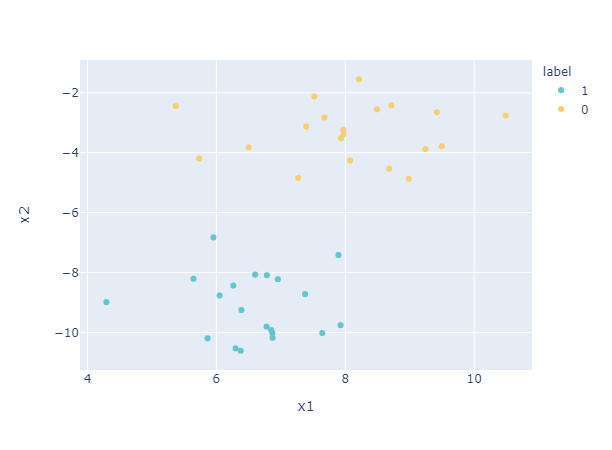

In [62]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn import svm
from sklearn.datasets import make_blobs

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
# print(X.shape, y.shape)

df = pd.DataFrame(X, columns = ['x1', 'x2'])
df['label'] = y
df['label'] = df['label'].astype('category')

# print(df.head())

fig = px.scatter(df, x = 'x1', y = 'x2', color = 'label',color_discrete_sequence=px.colors.qualitative.Pastel )
fig.show()

In [63]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(df[['x1', 'x2']].values, y)

# get support vectors
print(clf.support_vectors_)

# get indices of support vectors
print(clf.support_)

# get number of support vectors for each class
print(clf.n_support_)

[[ 7.27059007 -4.84225716]
 [ 5.95313618 -6.82945967]
 [ 7.89359985 -7.41655113]]
[16 21 30]
[1 2]


In [39]:
# pip install -U kaleido
# 설치 필요

In [40]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

In [84]:
import plotly.graph_objects as go
help(go.Contour)

Help on class Contour in module plotly.graph_objs._contour:

class Contour(plotly.basedatatypes.BaseTraceType)
 |  Contour(arg=None, autocolorscale=None, autocontour=None, coloraxis=None, colorbar=None, colorscale=None, connectgaps=None, contours=None, customdata=None, customdatasrc=None, dx=None, dy=None, fillcolor=None, hoverinfo=None, hoverinfosrc=None, hoverlabel=None, hoverongaps=None, hovertemplate=None, hovertemplatesrc=None, hovertext=None, hovertextsrc=None, ids=None, idssrc=None, legendgroup=None, line=None, meta=None, metasrc=None, name=None, ncontours=None, opacity=None, reversescale=None, showlegend=None, showscale=None, stream=None, text=None, textsrc=None, transpose=None, uid=None, uirevision=None, visible=None, x=None, x0=None, xaxis=None, xcalendar=None, xperiod=None, xperiod0=None, xperiodalignment=None, xsrc=None, xtype=None, y=None, y0=None, yaxis=None, ycalendar=None, yperiod=None, yperiod0=None, yperiodalignment=None, ysrc=None, ytype=None, z=None, zauto=None, zho

* plotly 로 변경해보기

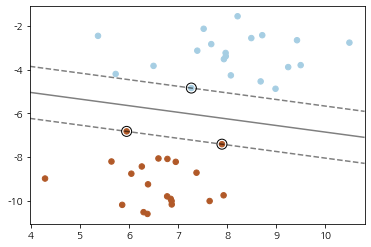

In [97]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
# meshgrid 를 이용하여 등고선을 그리는 방식 사용
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()


##### + Kernel Trick
커널은 input space 에 존재하는 데이터들을 feature space 로 옮겨주는 역할을 하는 mapping 입니다. 보통은 ϕ 로 표기하죠. Feature space 에서의 선형 분류는 input space 에서는 비선형 분류가 됩니다.

커널 트릭이 뭔지 보기 전에 커널이 뭔지 알고 갑시다.

커널은 연속함수 
$K(x,y)$ 로 실수, 함수나 벡터 등등을 $x, y$ 인자로 받고 실수를 내뱉는 symmetric한 함수입니다. 
$(K(x,y)=K(y,x))∈R$ 그럼 SVM에서는 mapping $ϕ(x)^T, ϕ(x)$ 를 인자로 받고 내적하여 실수를 출력하는 것이죠. 즉 직접 mapping을 하지 않아도 될 뿐더러 몰라도 됩니다. 그냥 커널을 하나 정해서 계산하기만 하면 되죠.

> non-linear  `gamma = 'auto'`

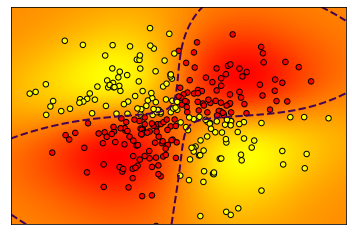

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma='auto')
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap = plt.cm.autumn)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.autumn,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

### 1.1. Multi-class classification

SVC and NuSVC implement the “one-versus-one” approach for multi-class classification. In total, `n_classes * (n_classes - 1) / 2` classifiers are constructed and each one trains data from two classes. To provide a consistent interface with other classifiers, the `decision_function_shape` option allows to monotonically transform the results of the “one-versus-one” classifiers to a “one-vs-rest” decision function of shape `(n_samples, n_classes)`.

In [113]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
# one vs one
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)

dec = clf.decision_function([[1]])
print(dec.shape[1]) # 4 classes: 4*3/2 = 6

# one vs rest
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

6


4

On the other hand, LinearSVC implements “one-vs-the-rest” multi-class strategy, thus training n_classes models.

In [114]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y)

dec = lin_clf.decision_function([[1]])
dec.shape[1]

4

### 1.2. Scores and probabilities

The decision_function method of SVC and NuSVC gives **per-class scores for each sample** (or a single score per sample in the binary case). When the constructor option `probability` is set to `True`, class membership probability estimates (from the methods `predict_proba` and `predict_log_proba`) are enabled. In the binary case, the probabilities are calibrated using Platt scaling 9: logistic regression on the SVM’s scores, fit by an additional cross-validation on the training data. In the multiclass case, this is extended as per 10.

In [118]:
help(svm.SVC)
# svm.SVC(probability = True)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

### 1.3. Unbalanced problems

`class_weight` 사용가능

In [3]:
help(svm.SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

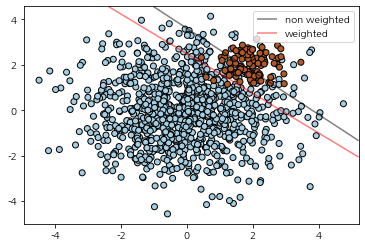

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()

## 2. Regression

The method of Support Vector Classification can be extended to solve regression problems. This method is called Support Vector Regression.

The model produced by support vector classification (as described above) depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function ignores samples whose prediction is close to their target.

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR. See Implementation details for further details.

As with classification classes, the fit method will take as argument vectors X, y, only that in this case y is expected to have floating point values instead of integer values:

Automatically created module for IPython interactive environment


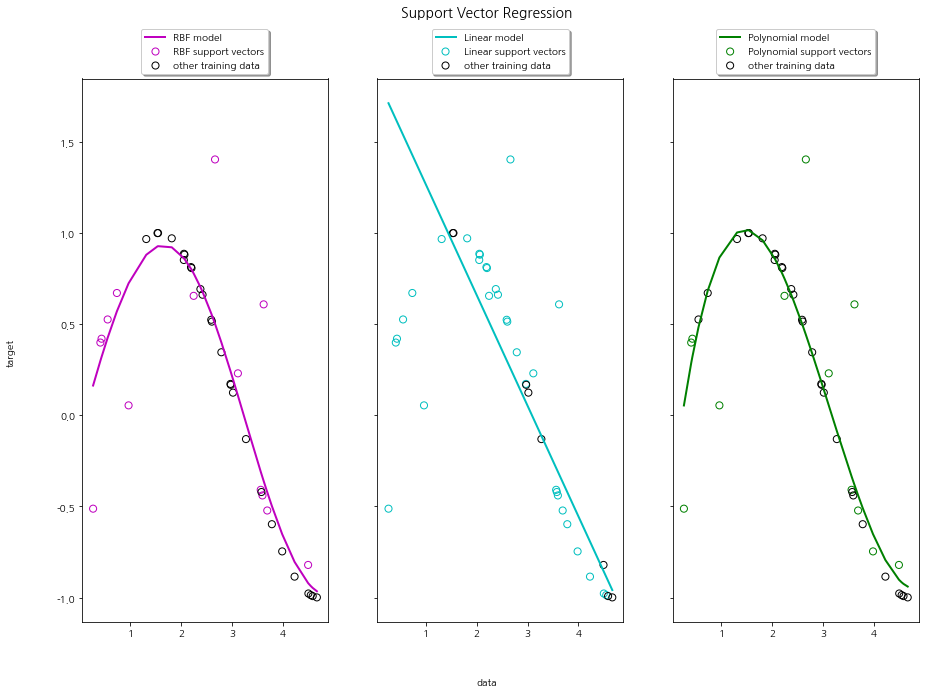

In [4]:
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## 3. Density estimation, novelty detection

Novelty and Outlier Detection
Many applications require being able to decide whether a new observation belongs to the same distribution as existing observations (it is an inlier), or should be considered as different (it is an outlier). Often, this ability is used to clean real data sets. Two important distinctions must be made:

outlier detection
The training data contains outliers which are defined as observations that are far from the others. Outlier detection estimators thus try to fit the regions where the training data is the most concentrated, ignoring the deviant observations.

novelty detection
The training data is not polluted by outliers and we are interested in detecting whether a new observation is an outlier. In this context an outlier is also called a novelty.

One-Class SVM을 사용하여 가능하다.

## 4. Complexity

Support Vector Machines are powerful tools, but their compute and storage requirements increase rapidly with the number of training vectors. The core of an SVM is a quadratic programming problem (QP), separating support vectors from the rest of the training data.

For the linear case, the algorithm used in LinearSVC by the liblinear implementation is much more efficient than its libsvm-based SVC counterpart and can scale almost linearly to millions of samples and/or features.

## 5. Tips on Practical Use

 + Avoiding data copy
 
 + Kernel cache size:  
   
 For SVC, SVR, NuSVC and NuSVR, the size of the kernel cache has a strong impact on run times for larger problems. If you have enough RAM available, it is recommended to set cache_size to a higher value than the default of 200(MB), such as 500(MB) or 1000(MB).  
 
 + Setting C:  
 C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization.  
 
 + gamma
 gamma 값이 커지면 decision boundary가 유연하게 data에 fit하게 생성된다. (over fitting 가능성이 있음)

## 6. Kernel functions

The kernel function can be any of the following:
+ linear: $  \langle x, x'\rangle $
+ polynomial: $ (\gamma \langle x, x'\rangle + r)^d $ , where $d$ is specified by parameter `degree` $r$,  by `coef0`.
+ rbf: $\exp(-\gamma \|x-x'\|^2)$ , where $\gamma$ is specified by parameter `gamma`, must be greater than 0.
+ sigmoid: $\tanh(\gamma \langle x,x'\rangle + r)$ , where $r$ is specified by `coef0`.

### 6.1. Parameters of the RBF Kernel

When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

Proper choice of C and gamma is critical to the SVM’s performance. One is advised to use GridSearchCV with C and gamma spaced exponentially far apart to choose good values.